In [102]:
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
sns.set_theme()

In [5]:
df = pd.read_csv("/Users/christineyoon/Library/Mobile Documents/com~apple~CloudDocs/Albert Einstein/ir project/TIPS project/Thrombosed_Data_1.csv")

In [6]:
df

,ID,a,b,c,First Derivative,Second Derivative
0,263432,0.145833,-132.125000,30110.312500,-3.500000,0.291667
1,1021223,0.004959,-5.742149,1955.352066,-0.545455,0.009917
2,1054317,0.000563,-0.565209,269.867517,-0.082192,0.001126
3,1459348,0.053719,-51.785124,12880.214876,2.363636,0.107438
4,2311183,0.204545,-204.136364,51219.022727,9.000000,0.409091
5,2463830,0.029442,-14.485537,2050.721074,2.590909,0.058884
6,2878370,0.006747,-8.352167,2881.995783,-1.038961,0.013493
7,3162348,0.029586,-23.668639,4960.727811,2.307692,0.059172
8,3726552,0.003205,-3.339180,1127.856468,0.493506,0.006409
9,3910060,-0.001724,1.482333,-178.701523,0.203390,-0.003447


In [7]:
thrombo_data = df['Second Derivative']

In [8]:
df1 = pd.read_csv("/Users/christineyoon/Library/Mobile Documents/com~apple~CloudDocs/Albert Einstein/ir project/TIPS project/allData (9).csv")

In [9]:
df1

,ID,a,b,c,First Derivative,Second Derivative
0,263432.0,0.000905,-0.947035,785.649615,-0.340426,0.001811
1,312371.0,0.000000,0.000000,458.000000,0.000000,0.000000
2,418302.0,0.001624,-1.520232,764.734200,-0.386555,0.003248
3,429589.0,0.001333,-1.141333,1042.245333,-0.400000,0.002667
4,480412.0,0.006638,-7.434710,2357.718927,-1.420561,0.013276
...,...,...,...,...,...,...
220,9606156.0,0.007353,-7.926471,2582.183824,-1.000000,0.014706
221,9616291.0,0.026501,-23.479719,5434.757707,-2.279070,0.053002
222,9651961.0,0.020399,-13.177951,2367.239149,-1.958333,0.040799
223,9686385.0,0.000266,-0.287708,567.681283,-0.072993,0.000533


In [10]:
tips_data = df1['Second Derivative']

In [11]:
new_df = pd.DataFrame({'thrombosed_tips': thrombo_data, 'unthrombosed_tips': tips_data})

In [12]:
new_df

,thrombosed_tips,unthrombosed_tips
0,0.291667,0.001811
1,0.009917,0.000000
2,0.001126,0.003248
3,0.107438,0.002667
4,0.409091,0.013276
...,...,...
220,NaN,0.014706
221,NaN,0.053002
222,NaN,0.040799
223,NaN,0.000533


In [29]:
print('thrombosed tips data mean: {}'.format(statistics.mean(thrombo_data)))
print('unthrombosed tips data mean: {}'.format(statistics.mean(tips_data)))
print('thrombosed tips data median: {}'.format(statistics.median(thrombo_data)))
print('unthrombosed tips data median: {}'.format(statistics.median(tips_data)))
print('thrombosed tips data mode: {}'.format(statistics.mode(thrombo_data)))
print('unthrombosed tips data mode: {}'.format(statistics.mode(tips_data)))

thrombosed tips data mean: 0.09595032961727433
unthrombosed tips data mean: 0.022632829154989004
thrombosed tips data median: 0.0385015608740894
unthrombosed tips data median: 0.0076628352490421
thrombosed tips data mode: 0.2916666666666667
unthrombosed tips data mode: 0.0


<AxesSubplot:>

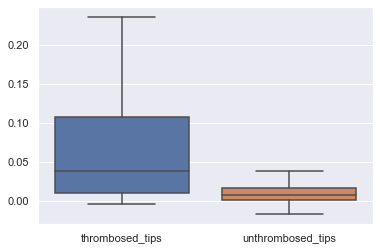

In [38]:
sns.boxplot(data=new_df, showfliers=False)

<AxesSubplot:ylabel='Count'>

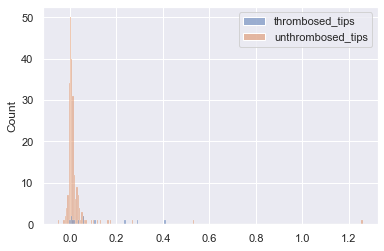

In [41]:
sns.histplot(data=new_df, kde=False)

In [44]:
stats.ttest_ind(thrombo_data, tips_data, equal_var=True)

Ttest_indResult(statistic=2.651041950677058, pvalue=0.00856772136134329)

In [45]:
stats.mannwhitneyu(thrombo_data, tips_data)

MannwhitneyuResult(statistic=2149.5, pvalue=0.004451250989077574)

In [47]:
new_df

,thrombosed_tips,unthrombosed_tips
0,0.291667,0.001811
1,0.009917,0.000000
2,0.001126,0.003248
3,0.107438,0.002667
4,0.409091,0.013276
...,...,...
220,NaN,0.014706
221,NaN,0.053002
222,NaN,0.040799
223,NaN,0.000533


In [61]:
df2 = pd.DataFrame({
    'tips_data': list(thrombo_data) + (list(tips_data)),
    'ground_truth': ([1]*len(thrombo_data)) + ([0]*len(tips_data))
})

In [62]:
df2

,tips_data,ground_truth
0,0.291667,1
1,0.009917,1
2,0.001126,1
3,0.107438,1
4,0.409091,1
...,...,...
233,0.014706,0
234,0.053002,0
235,0.040799,0
236,0.000533,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df2['tips_data'], df2['ground_truth'], test_size=0.25)

In [81]:
X_train

125   -0.001315
168    0.002367
49     0.012475
187   -0.002520
203    0.005142
         ...   
175    0.004800
21    -0.015594
213   -0.001515
178    0.005487
56     0.000937
Name: tips_data, Length: 178, dtype: float64

In [90]:
# Create the model
model = LogisticRegression()

# Train the model
model.fit(np.array(X_train).reshape(-1,1), y_train)

# Evaluate the model
score = model.score(np.array(X_test).reshape(-1,1), y_test)
print('Accuracy:', score)

# Make predictions
predictions = model.predict(np.array(X_test).reshape(-1,1))

Accuracy: 0.9


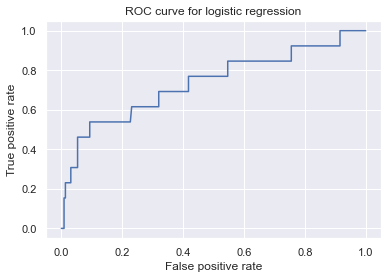

In [104]:
y_pred = model.predict_proba(np.array(df2['tips_data']).reshape(-1,1))[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(df2['ground_truth'], y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for logistic regression')
plt.show()